In [1]:
import pandas as pd
import seaborn
import numpy

data = pd.read_csv("Life-Expectancy-Data-Updated.csv")
data = data[data["Year"] == 2015] 

FileNotFoundError: [Errno 2] No such file or directory: 'Life-Expectancy-Data-Updated.csv'

<Axes: title={'center': 'Průměrná délka života vs. Hrubý domácí produkt na hlavu'}, xlabel='GDP_per_capita', ylabel='Life_expectancy'>

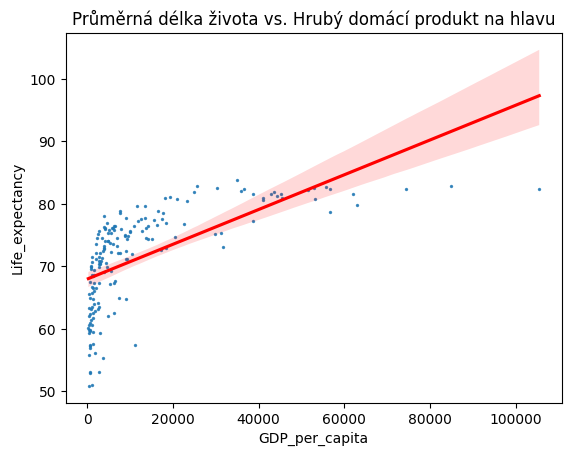

In [3]:
import matplotlib.pyplot as plt
plt.title("Průměrná délka života vs. Hrubý domácí produkt na hlavu")
seaborn.regplot(data, x="GDP_per_capita", y="Life_expectancy", line_kws={"color": "r"}, scatter_kws={"s": 2})



In [4]:
import statsmodels.api as sm
X = data["GDP_per_capita"]
y = data["Life_expectancy"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.90e-21
Time:                        20:50:11   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             67.9538      0.561    121.

In [5]:
X = data[["GDP_per_capita", "Schooling", "Incidents_HIV", "Diphtheria", "Polio", "BMI", "Measles"]]
print(data.head())
# "GDP_per_capita" (hrubý domácí produkt na hlavu v dolarech): Můžeme očekávat pozitivní vliv na délku života. Vyšší HDP na hlavu často souvisí s lepšími životními podmínkami a dostupností zdravotní péče.
# "Schooling" (průměrná délka studia): Delší doba studia by mohla značit lepší vzdělání a vyšší povědomí o zdraví, což může přispět k vyšší délce života. Očekáváme tedy pozitivní vliv.
# "Incidents_HIV" (nákazy virem HIV): Předpokládáme negativní vliv na délku života. Vyšší počet případů HIV pravděpodobně sníží průměrnou délku života.
# "Diphtheria" (procento populace očkované proti záškrtu): Očekáváme, že vyšší procento očkovaných proti záškrtu bude mít pozitivní vliv na délku života.
# "Polio" (procento populace očkované proti dětské obrně): Očekáváme, že vyšší procento očkovaných proti dětské obrně bude mít pozitivní vliv na délku života.
# "BMI" (průměrný BMI index populace): Nižší průměrná tělesná hmotnost v poměru k výšce může být spojena s lepším zdravím a s vyšší délkou života, proto očekáváme pozitivní vliv.
# "Measles" (procento populace očkované proti spalničkám): Očekáváme, že vyšší procento očkovaných proti spalničkám bude mít pozitivní vliv na délku života.

               Country          Region  Year  Infant_deaths  \
0              Turkiye     Middle East  2015           11.1   
1                Spain  European Union  2015            2.7   
6   Russian Federation  Rest of Europe  2015            6.6   
27            Cameroon          Africa  2015           57.0   
43         Gambia, The          Africa  2015           39.7   

    Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0                13.0         105.8240                 1.32           97   
1                 3.3          57.9025                10.35           97   
6                 8.2         223.0000                 8.06           97   
27               88.0         340.1265                 4.55           84   
43               59.8         261.7065                 2.69           97   

    Measles   BMI  ...  Diphtheria  Incidents_HIV  GDP_per_capita  \
0        65  27.8  ...          97           0.08           11006   
1        94  26.0  ...    

In [6]:
selected_columns = ["GDP_per_capita", "Schooling", "Incidents_HIV", "Diphtheria", "Polio", "BMI", "Measles", "Life_expectancy"]

model_data = data[selected_columns].dropna() 
X = model_data.drop("Life_expectancy", axis=1)  # Vysvětlující proměnná
y = model_data["Life_expectancy"]  # Vysvětlovaná proměnná
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit() 

# Test normality reziduí
residuals = model.resid 
normality_test = sm.stats.stattools.jarque_bera(residuals)
print("Test normality reziduí:")
print(normality_test)

# Koeficient determinace
r_squared = model.rsquared
print("Koeficient determinace:")
print(r_squared)

# Porovnání s koeficientem determinace pouze s GDP_per_capita
model_gdp = sm.OLS(y, sm.add_constant(X["GDP_per_capita"])).fit()
r_squared_gdp = model_gdp.rsquared
print("Koeficient determinace (jen GDP_per_capita):")
print(r_squared_gdp)

if normality_test[1] > 0.05:
    p_values = model.pvalues[1:] 
    max_p_value_index = p_values.idxmax()  
    X = X.drop(max_p_value_index, axis=1)
    model = sm.OLS(y, X).fit()
    r_squared_new = model.rsquared
    print("Koeficient determinace (po odebrání proměnné):")
    print(r_squared_new)

print("Koeficienty po odebrání proměnné:")
print(model.params)


Test normality reziduí:
(3.9652369082069963, 0.13770818225922193, -0.3465633304641417, 2.773665495624014)
Koeficient determinace:
0.7902413794322677
Koeficient determinace (jen GDP_per_capita):
0.3960851860371992
Koeficient determinace (po odebrání proměnné):
0.790235810899899
Koeficienty po odebrání proměnné:
const             37.950519
GDP_per_capita     0.000109
Schooling          0.845495
Incidents_HIV     -1.412915
Polio              0.134883
BMI                0.426020
Measles            0.038879
dtype: float64
